# IMPORTING LIBRARIES

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [53]:
# Load the dataset
df = pd.read_csv("C:/Users/prasa/Codetech/Datasets/MOVIE_GENRE.csv")

In [54]:
# Explore the dataset
print(df.head())
print(df.info())
df = df.dropna()

   Unnamed: 0                   Moive Name  Rating     Votes  Meta Score  \
0           0       Leave the World Behind     6.5   90000.0        67.0   
1           1                        Wonka     7.4   24000.0        66.0   
2           2                  Poor Things     8.5    6700.0        86.0   
3           3   Killers of the Flower Moon     7.8  128000.0        89.0   
4           4                 May December     7.0   21000.0        85.0   

                       Genre PG Rating  Year Duration  \
0   Drama, Mystery, Thriller         R  2023   2h 18m   
1  Adventure, Comedy, Family        PG  2023   1h 56m   
2     Comedy, Drama, Romance         R  2023   2h 21m   
3      Crime, Drama, History         R  2023   3h 26m   
4              Comedy, Drama         R  2023   1h 57m   

                                                Cast          Director  
0  Julia Roberts, Mahershala Ali, Ethan Hawke, My...        Sam Esmail  
1  Timothée Chalamet, Gustave Die, Murray McArthu...  

In [55]:
# Convert 'PG Rating' to numerical values (1 for 'R' and 0 for 'PG')
df['PG Rating'] = df['PG Rating'].apply(lambda x: 1 if x == 'R' else 0)

# Extract numerical features and target variable
X = df[['Rating', 'Votes', 'Meta Score', 'PG Rating', 'Year']]
y = df['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.06162464985994398
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                              precision    recall  f1-score   support

           Action, Adventure       0.00      0.00      0.00         0
Action, Adventure, Biography       0.00      0.00      0.00         1
   Action, Adventure, Comedy       0.00      0.00      0.00        12
    Action, Adventure, Crime       0.00      0.00      0.00         0
    Action, Adventure, Drama       0.00      0.00      0.00         9
   Action, Adventure, Family       0.00      0.00      0.00         2
  Action, Adventure, Fantasy       0.00      0.00      0.00        10
   Action, Adventure, Horror       0.00      0.00      0.00         0
  Action, Adventure, Mystery       0.00      0.00      0.00         1
  Action, Adventure, Romance       0.00      0.00      0.00         0
   Action, Adventure, Sci-Fi       0.4

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

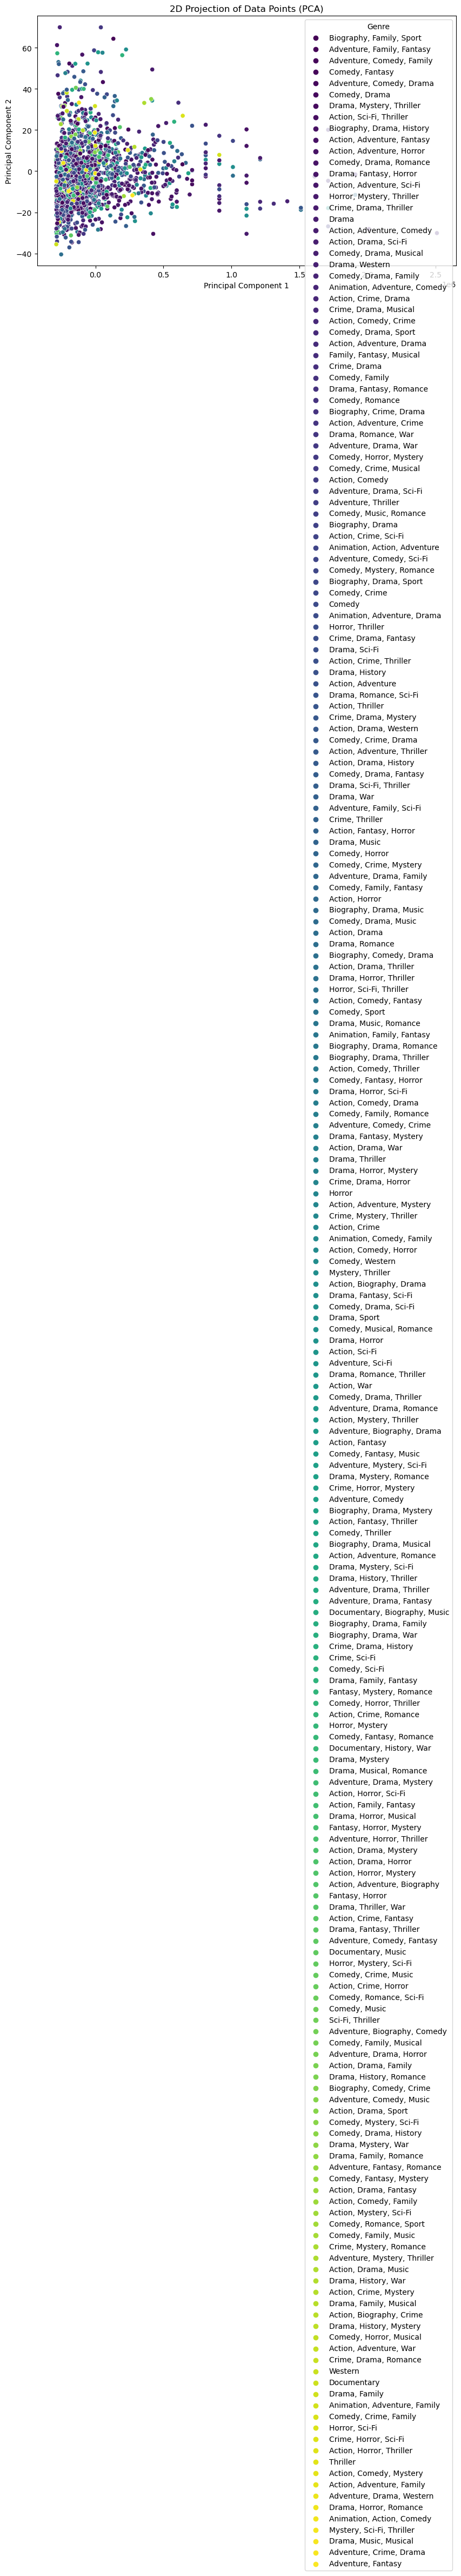

In [56]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', legend='full')
plt.title('2D Projection of Data Points (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre', loc='upper right')
plt.show()